In [1]:
from pycalphad import equilibrium, calculate
from pycalphad import Database, Model
from pycalphad.core.lower_convex_hull import lower_convex_hull
import pycalphad.variables as v

In [2]:
db_alfe = Database('alfe_sei.TDB')
my_phases_alfe = 'LIQUID'#['LIQUID', 'HCP_A3', 'AL5FE2', 'AL2FE', 'AL5FE4', 'FCC_A1', 'B2_BCC', 'AL13FE4']

In [3]:
%time eq = equilibrium(db_alfe, ['AL', 'FE', 'VA'], my_phases_alfe, {v.X('AL'): 0.3, v.T: 300, v.P: [101325]})
print(eq)

Components: AL FE VA
Phases: LIQUID [done]
Computing initial grid [14 points, 1.0KB]
Computing convex hull [iteration 1]
progress 47086.2623588 [1 conditions updated]
Refining convex hull
N-R convergence on mini-iteration 16
Rebuilding grid [16 points, 1.2KB]
Computing convex hull [iteration 2]
progress 5339.98151803 [1 conditions updated]
Refining convex hull
N-R convergence on mini-iteration 15
Rebuilding grid [18 points, 1.3KB]
Computing convex hull [iteration 3]
progress 3112.9516067 [1 conditions updated]
Refining convex hull
SAFE BREAK
SAFE BREAK
N-R convergence on mini-iteration 5
Rebuilding grid [20 points, 1.5KB]
Computing convex hull [iteration 4]
progress 1552.7495931 [1 conditions updated]
Refining convex hull
SAFE BREAK
N-R convergence on mini-iteration 12
Rebuilding grid [22 points, 1.6KB]
Computing convex hull [iteration 5]
progress 748.663247701 [1 conditions updated]
Refining convex hull
N-R convergence on mini-iteration 12
Rebuilding grid [24 points, 1.8KB]
Computing 

In [4]:
eq.X

<xray.DataArray 'X' (P: 1, T: 1, X_AL: 1, vertex: 2, component: 2)>
array([[[[[ 0.3000014 ,  0.6999986 ],
          [ 0.29999986,  0.70000014]]]]])
Coordinates:
  * X_AL       (X_AL) float64 0.3
  * vertex     (vertex) int64 0 1
  * component  (component) object 'AL' 'FE'
  * P          (P) float64 1.013e+05
  * T          (T) float64 300.0

KeyError: 1300.0

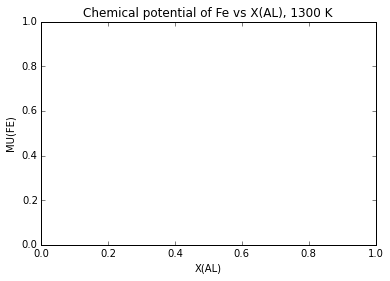

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from pycalphad.plot.utils import phase_legend
plt.gca().set_xlim((0,1))
plt.gca().set_title('Chemical potential of Fe vs X(AL), 1300 K')
plt.gca().set_xlabel('X(AL)')
plt.gca().set_ylabel('MU(FE)')
phase_handles, phasemap = phase_legend(my_phases_alfe)
phasecolors = [phasemap[str(p.values[0])] for p in eq.Phase.sel(T=1300, vertex=0)]
plt.scatter(eq.X.sel(T=1300, component='AL', vertex=0), eq.MU.sel(T=1300, component='FE'), color=phasecolors)
phasecolors = [phasemap[str(p.values[0])] for p in eq.Phase.sel(T=1300, vertex=1)]
plt.scatter(eq.X.sel(T=1300, component='AL', vertex=1), eq.MU.sel(T=1300, component='FE'), color=phasecolors)
plt.gca().legend(phase_handles, my_phases_alfe, loc='lower left')